In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15,10]

In [51]:
rw = pd.read_csv('winequality-red.csv')
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
rw.shape

(1599, 12)

In [54]:
rw.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [55]:
rw.isnull().sum()/len(rw)*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [56]:
rw.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [57]:
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality']

In [58]:
len(rw.select_dtypes(include=np.number).columns)

12

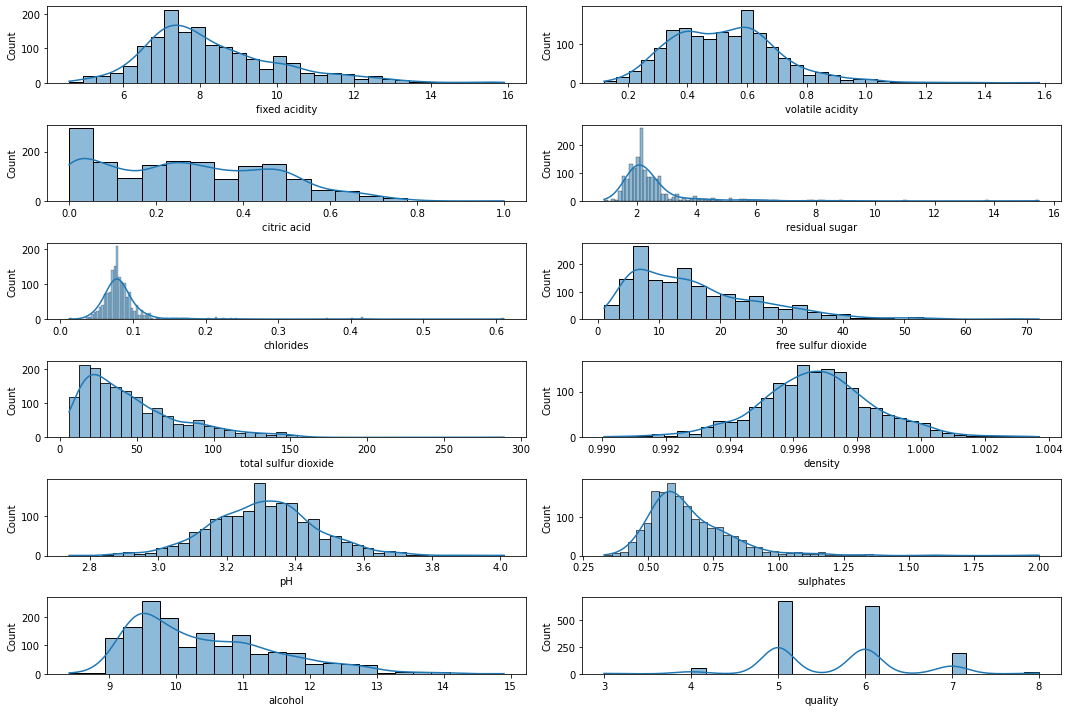

In [59]:

nrows = 6
ncols = 2
iterator = 1

for i in col:
    plt.subplot(nrows,ncols,iterator)
    sns.histplot(x = rw.loc[:,i],kde = True)
    iterator = iterator+1
    
plt.tight_layout()
plt.show()

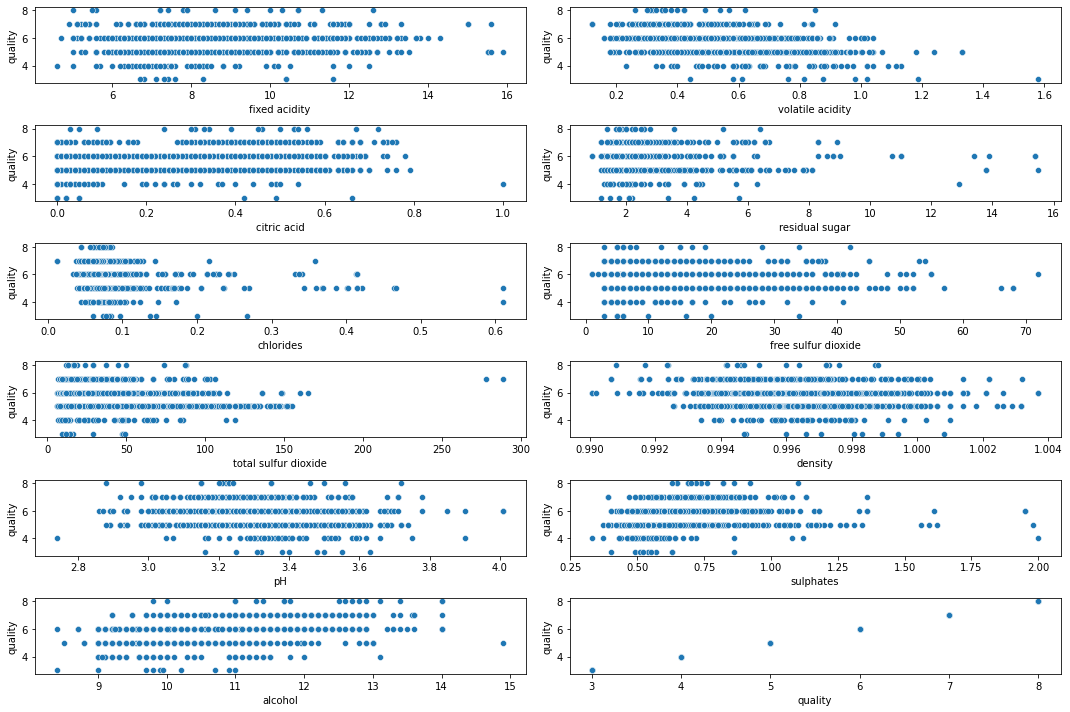

In [60]:

nrows = 6
ncols = 2
iterator = 1

for i in col:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(x = rw.loc[:,i],y = rw.quality)
    iterator = iterator+1
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

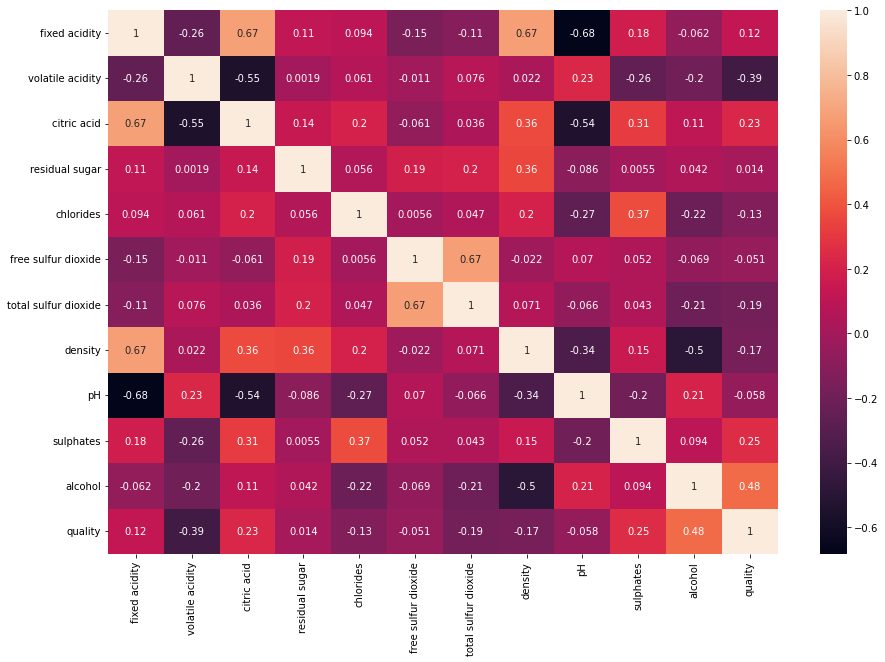

In [61]:
sns.heatmap(rw.corr(),annot=True)

In [62]:
X = rw.drop('quality',axis = 1)
y = rw['quality']

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [64]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 4)

In [65]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [66]:
# statsmodel
import statsmodels.api as sma

In [67]:
#add constant
temp_train = sma.add_constant(xtrain)  # to calculate the intercept too
temp_test = sma.add_constant(xtest)  # to calculate the intercept too

In [68]:
model = sma.OLS(ytrain,temp_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     57.57
Date:                Sun, 14 May 2023   Prob (F-statistic):          8.26e-101
Time:                        13:50:10   Log-Likelihood:                -1111.6
No. Observations:                1119   AIC:                             2247.
Df Residuals:                    1107   BIC:                             2307.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6432      0.020    287.130      0.000       5.605       5.682
x1             0.0927      0.055      1.686      0.092      -0.015       0.201
x2            -0.2035      0.026     -7.826      0.000      -0.255      -0.152
x3            -0.0482      0.034     -1.427      0.154      -0.115       0.018
x4             0.0167      0.026      0.644      0.520      -0.034       0.068
x5            -0.0868      0.024     -3.637      0.000      -0.134      -0.040
x6             0.0637      0.028      2.267      0.024       0.009       0.119
x7            -0.1181      0.029     -4.004      0.000      -0.176      -0.060
x8            -0.0516      0.050     -1.026      0.305      -0.150       0.047
x9            -0.0343      0.035     -0.967      0.334      -0.104       0.035
x10            0.1760      0.024      7.457      0.000       0.130       0.222
x11            0.2766      0.034      8.036      0.000       0.209       0.344
==============================================================================
Omnibus:                       12.446   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.341
Skew:                          -0.076   Prob(JB):                     0.000104
Kurtosis:                       3.608   Cond. No.                         7.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [70]:
pred_test = model.predict(temp_test)
pred_train = model.predict(temp_train)

r2_tt = r2_score(ytest,pred_test)
r2_tr = r2_score(ytrain,pred_train)

rmse_tt = np.sqrt(mean_squared_error(ytest,pred_test))
rmse_tr = np.sqrt(mean_squared_error(ytrain,pred_train))

mae_tt  = mean_absolute_error(ytest,pred_test)
mae_tr = mean_absolute_error(ytrain,pred_train)

print(r2_tr,r2_tt)
print(rmse_tr,rmse_tt)
print(mae_tr,mae_tt)

0.3639000659489664 0.3441022537449725
0.653389262476031 0.630576420074094
0.506885824194374 0.4892503222056354


In [71]:
from sklearn.linear_model import Ridge,RidgeCV

In [72]:
ridge = RidgeCV(alphas=(0.001,0.01,0.1,0.2,0.5,0.7,0.9,1.0),cv = 5)

ridge_model = ridge.fit(xtrain,ytrain)

pred_tt = ridge_model.predict(xtest)
pred_tr = ridge_model.predict(xtrain) 

r2_tt = r2_score(ytest,pred_tt)
r2_tr = r2_score(ytrain,pred_tr)

rmse_tt = np.sqrt(mean_squared_error(ytest,pred_tt))
rmse_tr = np.sqrt(mean_squared_error(ytrain,pred_tr))

mae_tt  = mean_absolute_error(ytest,pred_tt)
mae_tr = mean_absolute_error(ytrain,pred_tr)

print(r2_tr,r2_tt)
print(rmse_tr,rmse_tt)
print(mae_tr,mae_tt)

0.36389976736950114 0.3441815111898887
0.6533894158234717 0.6305383200912352
0.5069031315489543 0.48925398156709293


In [73]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = ({'alpha':(0.001,0.01,0.1,0.2,0.5,0.7,0.9,1.0)})
grid = GridSearchCV(estimator=ridge,param_grid=params,cv = 5)

grid.fit(x,y)
grid.best_params_

{'alpha': 1.0}

In [74]:
ridge = Ridge(alpha= 0.1,normalize=True)

r_model = ridge.fit(xtrain,ytrain)

pred_tt = r_model.predict(xtest)
pred_tr = r_model.predict(xtrain) 

r2_tt = r2_score(ytest,pred_tt)
r2_tr = r2_score(ytrain,pred_tr)

rmse_tt = np.sqrt(mean_squared_error(ytest,pred_tt))
rmse_tr = np.sqrt(mean_squared_error(ytrain,pred_tr))

mae_tt  = mean_absolute_error(ytest,pred_tt)
mae_tr = mean_absolute_error(ytrain,pred_tr)

print(r2_tr,r2_tt)
print(rmse_tr,rmse_tt)
print(mae_tr,mae_tt)


0.3613998400547206 0.3487974859747478
0.6546720944287021 0.6283153814197193
0.5099642484690913 0.4905162222633219


C:\Users\Sujith\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [75]:
from sklearn.linear_model import Lasso,LassoCV

In [76]:
lasso = LassoCV(alphas=(0.001,0.01,0.1,0.2,0.5,0.7,0.9,1.0),cv = 5)

lasso_model = lasso.fit(xtrain,ytrain)

pred_tt = lasso_model.predict(xtest)
pred_tr = lasso_model.predict(xtrain) 

r2_tt = r2_score(ytest,pred_tt)
r2_tr = r2_score(ytrain,pred_tr)

rmse_tt = np.sqrt(mean_squared_error(ytest,pred_tt))
rmse_tr = np.sqrt(mean_squared_error(ytrain,pred_tr))

mae_tt  = mean_absolute_error(ytest,pred_tt)
mae_tr = mean_absolute_error(ytrain,pred_tr)

print(r2_tr,r2_tt)
print(rmse_tr,rmse_tt)
print(mae_tr,mae_tt)

0.3638566857580222 0.34498891812906685
0.6534115417329676 0.6301500588463687
0.5070086904472392 0.4893639679251192


In [77]:
lasso = Lasso()
params = ({'alpha':(0.001,0.01,0.1,0.2,0.5,0.7,0.9,1.0)})
grid = GridSearchCV(estimator=lasso,param_grid=params,cv = 5)

grid.fit(x,y)
grid.best_params_

{'alpha': 0.01}

In [78]:
lasso = Lasso(alpha= 0.001,normalize=True)

l_model = lasso.fit(xtrain,ytrain)

pred_tt = l_model.predict(xtest)
pred_tr = l_model.predict(xtrain) 

r2_tt = r2_score(ytest,pred_tt)
r2_tr = r2_score(ytrain,pred_tr)

rmse_tt = np.sqrt(mean_squared_error(ytest,pred_tt))
rmse_tr = np.sqrt(mean_squared_error(ytrain,pred_tr))

mae_tt  = mean_absolute_error(ytest,pred_tt)
mae_tr = mean_absolute_error(ytrain,pred_tr)

print(r2_tr,r2_tt)
print(rmse_tr,rmse_tt)
print(mae_tr,mae_tt)


0.34847521350169386 0.3476352454952679
0.6612638619992285 0.6288758276810343
0.5172527239565934 0.49798758675111204


C:\Users\Sujith\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [79]:
from sklearn.linear_model import ElasticNet

In [80]:
enet = ElasticNet()

e_model = enet.fit(xtrain,ytrain)

pred_tt = e_model.predict(xtest)
pred_tr = e_model.predict(xtrain) 

r2_tt = r2_score(ytest,pred_tt)
r2_tr = r2_score(ytrain,pred_tr)

rmse_tt = np.sqrt(mean_squared_error(ytest,pred_tt))
rmse_tr = np.sqrt(mean_squared_error(ytrain,pred_tr))

mae_tt  = mean_absolute_error(ytest,pred_tt)
mae_tr = mean_absolute_error(ytrain,pred_tr)

print(r2_tr,r2_tt)
print(rmse_tr,rmse_tt)
print(mae_tr,mae_tt)


0.0 -0.0007770807301461513
0.8192365460850234 0.7789118888491529
0.6890966896429452 0.6678731009830207


In [81]:
from sklearn.linear_model import SGDRegressor

In [82]:
sgd = SGDRegressor()

sgd_model = sgd.fit(xtrain,ytrain)

pred_tt = sgd_model.predict(xtest)
pred_tr = sgd_model.predict(xtrain)

r2_tt = r2_score(ytest,pred_tt)
r2_tr = r2_score(ytrain,pred_tr)

rmse_tt = np.sqrt(mean_squared_error(ytest,pred_tt))
rmse_tr = np.sqrt(mean_squared_error(ytrain,pred_tr))

mae_tt  = mean_absolute_error(ytest,pred_tt)
mae_tr = mean_absolute_error(ytrain,pred_tr)

print(r2_tr,r2_tt)
print(rmse_tr,rmse_tt)
print(mae_tr,mae_tt)


0.3628179113142478 0.33799587325340463
0.6539448102086196 0.633504939769946
0.5072944194558184 0.48978141286404586


In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
gbr = GradientBoostingRegressor()

gbr_model = gbr.fit(xtrain,ytrain)

pred_tt = gbr_model.predict(xtest)
pred_tr = gbr_model.predict(xtrain)

r2_tt = r2_score(ytest,pred_tt)
r2_tr = r2_score(ytrain,pred_tr)

rmse_tt = np.sqrt(mean_squared_error(ytest,pred_tt))
rmse_tr = np.sqrt(mean_squared_error(ytrain,pred_tr))

mae_tt  = mean_absolute_error(ytest,pred_tt)
mae_tr = mean_absolute_error(ytrain,pred_tr)

print(r2_tr,r2_tt)
print(rmse_tr,rmse_tt)
print(mae_tr,mae_tt)


0.6513823658453426 0.40849858222651747
0.4837088056521361 0.5988217309043965
0.37756944142692517 0.46791817413984294
